# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
# Example of API call: api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=API_KEY
# Create URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 
api_keys = weather_api_key
appid = api_keys
settings = {"units": "metric", "appid": api_keys}
# url = f"{url}appid={api_keys}&units={units}"
# url

'http://api.openweathermap.org/data/2.5/weather?'

In [5]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?q=Australia,au&APPID=15743459e8908c32302f07bf002b72dd"
# response = requests.get(base_url).json()
# print(json.dumps(response, indent=4, sort_keys=True))


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
# Create an empty list to hold city data
city_data=[]

# Print the beginning of data retrieval log
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to retrieve all the information required from the Weather API
# using enumerate() to get a counter in a loop
for i, city in enumerate(cities):

    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        record_count = 0
        set_count += 1
        
    # API endpoint URL
    city_url = f"{url}appid={api_keys}&units={units}&q="
    
#     request.get weather data
    city_weather = requests.get(city_url + city).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # print(city_url)

    # From the data retrieved from each api call, add 1 to the record count into city_data list
    record_count += 1
    
    # Required information for each of the cities stored in a variable
    try:
        
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the information for each variable in city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # Use except to indicate if an error is found during the process to skip that city    
    except:
        print("City not found. Skipping city...")
        pass

# Display the end of the process
print("------------Data retrieval is complete------------.")   
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | antu
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | carutapera
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | alugan
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | rio gallegos
Processing Record 21 of Set 1 | defiance
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | puerto ayor

Processing Record 36 of Set 4 | nuuk
Processing Record 37 of Set 4 | sento se
City not found. Skipping city...
Processing Record 38 of Set 4 | cherskiy
Processing Record 39 of Set 4 | tuy hoa
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | ambon
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | itarema
Processing Record 47 of Set 4 | caceres
Processing Record 48 of Set 4 | mogadishu
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping city...
Processing Record 0 of Set 5 | champerico
Processing Record 1 of Set 5 | mackay
Processing Record 2 of Set 5 | dolinsk
Processing Record 3 of Set 5 | natal
Processing Record 4 of Set 5 | krasnaya gorbatka
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | kankon
Processing Record 7 of Set 5 | karakendzha
City not found. Skipping city...
Processing Re

Processing Record 21 of Set 8 | urman
Processing Record 22 of Set 8 | de aar
Processing Record 23 of Set 8 | collierville
Processing Record 24 of Set 8 | krasnovishersk
Processing Record 25 of Set 8 | marawi
Processing Record 26 of Set 8 | airai
Processing Record 27 of Set 8 | ukiah
Processing Record 28 of Set 8 | sambava
Processing Record 29 of Set 8 | bur gabo
City not found. Skipping city...
Processing Record 30 of Set 8 | acapulco
Processing Record 31 of Set 8 | mbandaka
Processing Record 32 of Set 8 | rawatsar
Processing Record 33 of Set 8 | utiroa
City not found. Skipping city...
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | boa vista
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | hoquiam
Processing Record 38 of Set 8 | muroto
Processing Record 39 of Set 8 | lima
Processing Record 40 of Set 8 | belmonte
Processing Record 41 of Set 8 | lalibela
Processing Record 42 of Set 8 | srivardhan
Processing Record 43 of Set 8 | kysyl-syr
Pro

Processing Record 3 of Set 12 | goba
Processing Record 4 of Set 12 | maracacume
Processing Record 5 of Set 12 | carros
Processing Record 6 of Set 12 | tondano
Processing Record 7 of Set 12 | aksehir
Processing Record 8 of Set 12 | yingcheng
Processing Record 9 of Set 12 | hounde
Processing Record 10 of Set 12 | portland
Processing Record 11 of Set 12 | constitucion
Processing Record 12 of Set 12 | chumikan
Processing Record 13 of Set 12 | belle glade
Processing Record 14 of Set 12 | linhares
Processing Record 15 of Set 12 | alofi
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | deloraine
Processing Record 18 of Set 12 | moskovskiy
Processing Record 19 of Set 12 | shingu
Processing Record 20 of Set 12 | suntar
Processing Record 21 of Set 12 | kingsville
Processing Record 22 of Set 12 | banff
Processing Record 23 of Set 12 | lyngdal
Processing Record 24 of Set 12 | komsomolskoye
Processing Record 25 of Set 12 | rapar
Processing Record 26 of Set 12 | touros
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create the dataframe from city data
weather_data=pd.DataFrame(city_data)

# Export city data to csv
weather_data.to_csv("WeatherPy.csv",encoding="utf-8",index_label="City_ID")

# Display the dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-8.61,80,100,3.54,RU,1667034426
1,atuona,-9.8000,-139.0333,24.70,69,10,8.56,PF,1667034427
2,georgetown,5.4112,100.3354,31.96,77,20,2.57,MY,1667034355
3,east london,-33.0153,27.9116,24.99,57,74,10.13,ZA,1667034428
4,castro,-24.7911,-50.0119,16.31,92,65,1.78,BR,1667034429


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_check = weather_data["Humidity"].describe(include = "all")
humidity_check

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    551.000000
mean      70.711434
std       21.674162
min        1.000000
25%       59.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [62]:
# Run a check for any cities with humidity over 100. In this study, there are no cities over 100%

print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")

humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
humid_city_data


By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


Int64Index([], dtype='int64')

In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()
# There are no changes to the city data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-8.61,80,100,3.54,RU,1667034426
1,atuona,-9.8000,-139.0333,24.70,69,10,8.56,PF,1667034427
2,georgetown,5.4112,100.3354,31.96,77,20,2.57,MY,1667034355
3,east london,-33.0153,27.9116,24.99,57,74,10.13,ZA,1667034428
4,castro,-24.7911,-50.0119,16.31,92,65,1.78,BR,1667034429


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

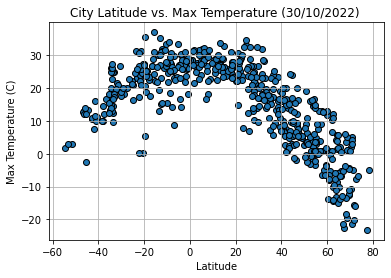

In [40]:
# Build a scatter plot for latitude vs temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

Latitude vs.Max Temperature plot displays a peak at approximately -20 degrees latitude. 

# Latitude vs. Humidity Plot

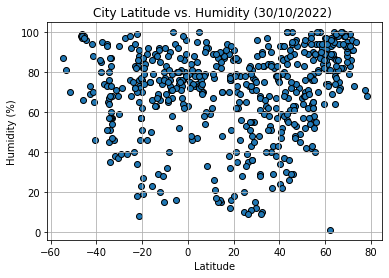

In [65]:
# Build a scatter plot for latitude vs humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

Latitude vs. Humidity plot displays a larger cluster point above 80% humidty and between a latitude of 50 to 70.

## Latitude vs. Cloudiness Plot

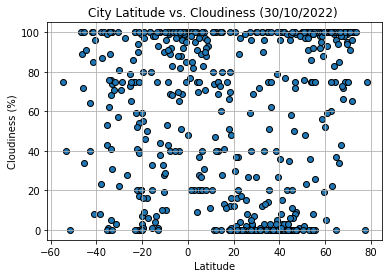

In [67]:
# Build a scatter plot for latitude vs cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

Looking at Latitude vs. Cloudiness, it appears cluster points for  most dense cloudiness are noticeably apparent along -20 to 0 and again from 40 to 70. 

## Latitude vs. Wind Speed Plot

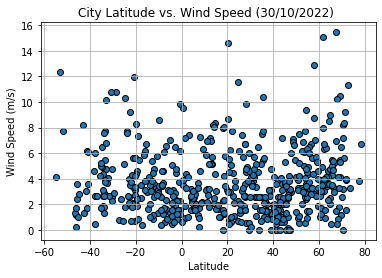

In [68]:
# Build a scatter plot for latitude vs wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()

Latitude vs. Wind Speed plot shows no apparent relationship between wind speed and latitude. Across the plot, wind speed  are does not exceed 16 m/s, with the majority sitting within the 0 to 4 wind speed range.

## Linear Regression

In [70]:
# Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the scatterplot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [71]:
# Create DataFrames & determine Northern Hemisphere & Southern Hemisphere (of the equator)
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.759479146720054


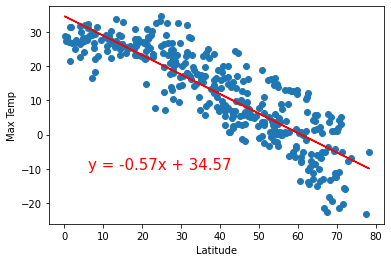

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,-10))



The Max Temperature vs. Latitude plot shows max temperature has a strong positive linear relationship with latitudes in the northern hemisphere, with an r-value of 0.759.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4003195823083935


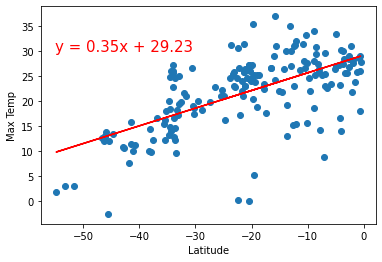

In [73]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,30))


The Max Temperature vs. Latitude plot for Southern hemisphere cities shows max temperature has a positive linear relationship with latitudes, with r-value of 0.4.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08373356257299878


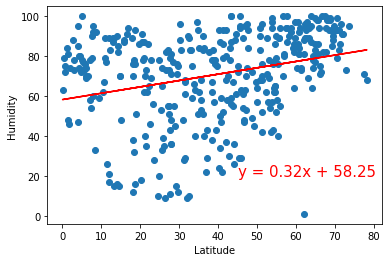

In [57]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,20))



The humidity % in Northern Hemisphere cities shows marginal relationship vs latitude although there is a very slight positive relationship in cities above 60 degrees lat

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0017205117123099544


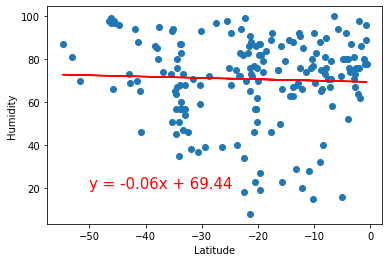

In [74]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

The Humidity vs. Latitude plot for cities in the southern hemisphere seems to show no relationship between the humidity and latitude

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0827150088603962


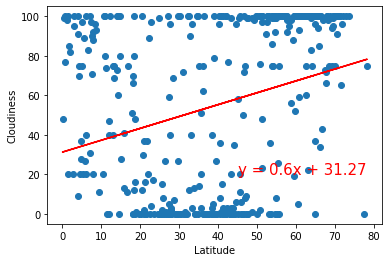

In [75]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(45,20))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013819929726794937


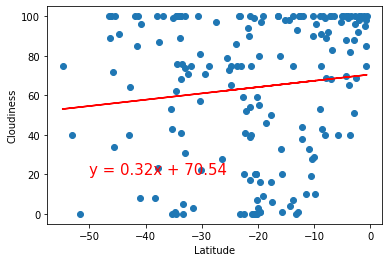

In [61]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,20))

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.022045162774460295


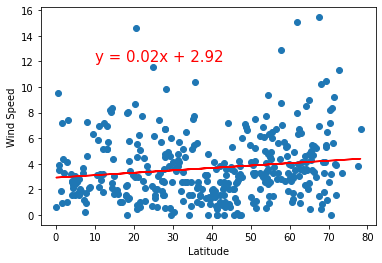

In [85]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,12))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02484884443957839


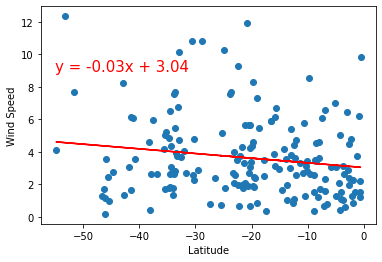

In [86]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))